In [1]:
import numpy as np 
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

# Load .np file

In [45]:
data = np.load('/Utilisateurs/pchau/data/cdip_qa.npy', allow_pickle=True)
len(data)

100000

In [46]:
# print sample
# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame.from_records(data)
df.shape

(100000, 5)

In [47]:
df.duplicated().value_counts()

False    100000
Name: count, dtype: int64

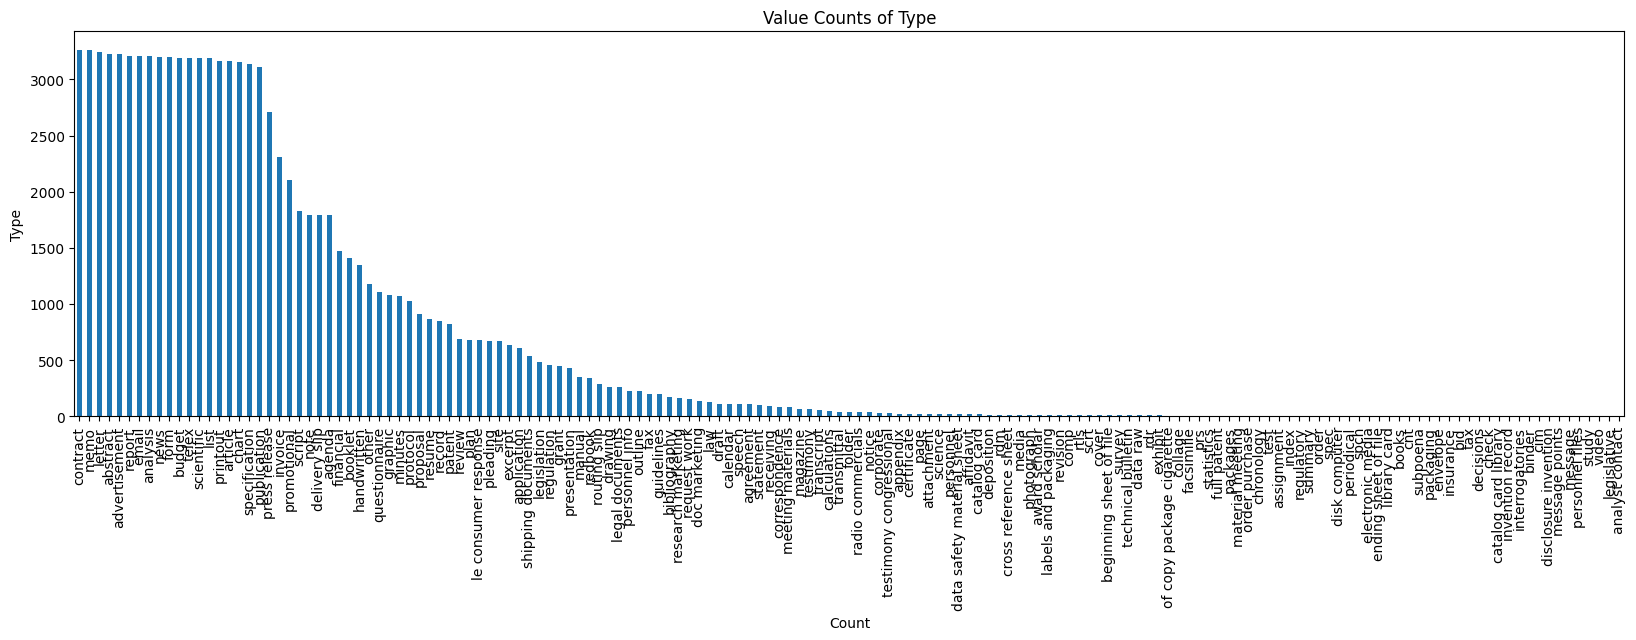

In [48]:
value_counts = df.category.value_counts()
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
value_counts.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Value Counts of Type')
plt.show()

In [9]:
def test(category, index): 
    a = df[df.category==category].iloc[index]
    pprint(f'Content:\n {a.content}')
    pprint(f'Response:\n {a.response}')
    pprint(f'Key:\n {a.key}')
    pprint(f'Path:\n{a.image_path}')

In [12]:
test('memo', 10)

('Content:\n'
 ' NOV, 11. 1998 5: 24PMMEMORANDUMTO: FROM: DATERE: CMF STEERING '
 'COIv1MITTEEMARTHA S. WARRENNOVEMBER 11, 1998TESTING PROTOCOLN0, 1623 P. '
 '214Attached is a written protocol for the Massachusetts individual cases '
 'test projectCandidly, this was very difficult to write. I tried to cover as '
 'many issues and contingencies aspossible, but I undoubtedly missed some. The '
 'piece was also difficult to organize. I attempted toavoid duplicative '
 'discussions, but, at times, this was impossible. I provided an overview of '
 'thepurpose of the test and its basic parameters. I then Iisted, in outline '
 'form, the division ofresponsibilities. I also included a discussion of '
 'Special Issues and concluded with a relativelybrief, narrative work flow '
 'section. Per our previous discussion, I did not do anything '
 'regardingmatrices or cost allocation, I am circulating the report today so '
 'that people will have as much time as possibleto review it before the '
 'No

# Convert to huggingface dataset

In [49]:
df['response'] = df.response.replace('\n\n', ' ', regex=True)
df['response'] = df.response.replace('\n', ' ', regex=True)

In [50]:
df['inputs'] = df['response'] + ' Content: '+ df['content']
df['inputs'].iloc[0]

'Question: What is the respondent number for the questionnaire mentioned in the administrative document? Answer: The respondent number for the questionnaire is not explicitly stated in the provided document. Content: rs41CE. 5IlAfskYt : U: . IK. St, . r. 1f. adw. wgt 1. f. tfrijrtEtirtilouPrit: AMtlttittEtfr. . Eo4titIrrah6uKe: loldta: C1w1s. r49t, iMS i1rltoMhclltt! tttotroa t o: rW tc. etr sri c. f! lrietYtly. tra na. r 1wWC ie 1rcii LSY. Rxr. thry eaveflr. ble4 I Ii, i , i I, . ! . Y1d v. r tell e, . 7 ttlc t. r, . . , af: c: , ard sr. gti of cwcry i: : rv4K: a lof your haurotYald w1lois yt: rs ar o16tt1I i II I II2. tlt7. , t. f tIn. r a. re . ENIy. k7o: 1 ir t1 uFilO breorld of uralr sn. : . l. rr! 4. At. c. ut hlt. r lorig hr, R tiu! at tKarlr thoft us, ura breatutS. ktirc irY your hnuKC! , ald is on tho cfgarttrttr, tcMstinir, pxrlel4I Sh4? F: w: K1: AJ: sm . . uSINgt! l. lti rrtly 3tbr. raryr sltoi. e. orrtc irl your housctrold lisrY srnt cipnro, ttta to tost. Ckmd you trll e, 

In [51]:
df.head()

image_path  \
0  /common/datasets/cdip/images/imagesf/f/f/e/ffe...   
1  /common/datasets/cdip/images/imagesq/q/t/j/qtj...   
2  /common/datasets/cdip/images/imagesg/g/d/s/gds...   
3  /common/datasets/cdip/images/imageso/o/p/a/opa...   
4  /common/datasets/cdip/images/imagesz/z/n/a/zna...   

                                             content       category  \
0  rs41CE. 5IlAfskYt : U: . IK. St, . r. 1f. adw....  questionnaire   
1  ERF Grant 229 THE. ACUTE EFFECTS OF TOBACCO SM...        excerpt   
2  U , C6, tnr. aderrrsiugttO0. NJ77EVVVDAIGHAiMM...         letter   
3  Use extra pages as needed1. Prinural I. jvss: ...          grant   
4  No extra copy item 1. ivailable at this. ime. ...           list   

                                                 key  \
0                               respondent number: .   
1  erf grant 229, the acute effects of tobacco sm...   
2     rotary painted bulletins, san diego california   
3               oncogenes in chemical carcinogenesis   
4            list of material on smoking and health.   

                                            response  \
0  Question: What is the respondent number for th...   
1  Question: What is the purpose of ERF Grant 229...   
2  Question: What is the recommended number of ro...   
3  Question: What is the proposed method for stud...   
4  Question: What is the title and publication ye...   

                                              inputs  
0  Question: What is the respondent number for th...  
1  Question: What is the purpose of ERF Grant 229...  
2  Question: What is the recommended number of ro...  
3  Question: What is the proposed method for stud...  
4  Question: What is the title and publication ye...

In [30]:
# Shuffle the DataFrame
d = df['inputs'].to_frame()
raw_datasets = d.sample(frac=1).reset_index(drop=True)

In [54]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and test sets
train_df, test_df = train_test_split(d, test_size=0.2, shuffle=True, random_state=11)

In [55]:
from datasets import Dataset, DatasetDict

# Convert the DataFrames into Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Remove the index column if present in the datasets
train_dataset = train_dataset.remove_columns('__index_level_0__') if '__index_level_0__' in train_dataset.column_names else train_dataset
test_dataset = test_dataset.remove_columns('__index_level_0__') if '__index_level_0__' in test_dataset.column_names else test_dataset

In [56]:
# Create a DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})
dataset

DatasetDict({
    train: Dataset({
        features: ['inputs'],
        num_rows: 80000
    })
    test: Dataset({
        features: ['inputs'],
        num_rows: 20000
    })
})

In [57]:
dataset.save_to_disk('Data_CDIP_QA')

Saving the dataset (1/1 shards): 100%|██████████| 20000/20000 [00:00<00:00, 50104.33 examples/s]


# Load data

In [58]:
from datasets import load_from_disk

raw_datasets = load_from_disk('Data_CDIP_QA')

In [59]:
raw_datasets['train'][10]

{'inputs': 'Question: What are the special promotions for Harley available in areas 2, 4, and 5, as mentioned in the document, and what are the valid dates for these promotions? Answer: The special promotions for Harley in areas 2, 4, and 5 are the ones with the code 5CPN, valid from February 24, 2005, to an undisclosed end date. Content: SPECIAL PRCMOTIONSHAHLEI35CPN JULYBEpT lts5074gtAREAS2. 4AND5 TOFRpM: K. A. tgtARROWF. 811cCIGNO. . . . . DATE: 24Febtr05 Mgp Min. ShippinB 4tY. ICIteMC4deREqIpN i ENTER TtER LEYEL2 iASNUMBERpN4Y DacttptinnICM5q DsscnptbnICMSq DuscripQndICMSfi Dencriptiun IpMS4 i Dascrip4pn IClMSp DeacriptkmIClMSq DcnpfbQ lescripkhnICMS4 ICIMSp DescfipNOnIpMSt, i DaearipWn DaacrynkmIClMSp ICMStlDIN51pN , i Ship Tn i TIERNUMBERCUStamelF t NA 55 COUPON70575150 STATIC Ct, INq7CH2O5510 SHEIF TALlR CARTON FlA6 pKCTN FI, R DIS7F2611f20 I M275460 i OCF0103 15CTN CTR FLR PoSER CD I0601205 7a16S13 15CTN W8 CD , 7D150215 . Bl1Y DDWN Ii500 I m? x 1 8 2. 500 50 kM741 3a01 OI 01 a